# <span style="color:BLUE; font-weight:bold">ANÁLISIS BASE DE DATOS COVID-19</span>
## <span style="color:BLUE; font-weight:bold">Jefferson Martinez</span>
## <span style="color:BLUE; font-weight:bold">Ricardo Vargas</span>

### <span style="color:BLUE; font-weight:bold">IMPORTAR LIBRERIAS Y LLAMAR EL DATAFRAME</span>

In [50]:
#Traer libreria pandas para poderla utilizar
import pandas as pd
import plotly.express as px

In [3]:
# leer el dataframe desde la pagina de origen
df = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")

### <span style="color:BLUE; font-weight:bold">DIMENSIONAMIENTO DEL DATAFRAME</span>

In [4]:
#dimensionamiento en filas y columnas
df.shape

(289, 1147)

In [5]:
#nos entrega como se ve la base de datos en su base
df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288


### <span style="color:BLUE; font-weight:bold">ANÁLISIS DE DATOS NULOS Y TIPO DE DATOS</span>

In [6]:
#Encuentra los datos nulos y los suma por columna
df.isnull().sum()

Province/State    198
Country/Region      0
Lat                 2
Long                2
1/22/20             0
                 ... 
3/5/23              0
3/6/23              0
3/7/23              0
3/8/23              0
3/9/23              0
Length: 1147, dtype: int64

In [7]:
#se crea la variable de columnas
col =df.columns

Se toma una muestra de las primeras 20 columnas para determinar la cantidad de datos nulos y el tipo de variables que tienen. De esta manera podemos visualizar en realidad como esta la base de datos y que debemos hacer con ella.

In [8]:
#tipo de datos de las primeras 20 columnas
#LAS COLUMNAS DE FECHAS NO TIENEN NIGUN VALOR NULO
df[col[:20]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  91 non-null     object 
 1   Country/Region  289 non-null    object 
 2   Lat             287 non-null    float64
 3   Long            287 non-null    float64
 4   1/22/20         289 non-null    int64  
 5   1/23/20         289 non-null    int64  
 6   1/24/20         289 non-null    int64  
 7   1/25/20         289 non-null    int64  
 8   1/26/20         289 non-null    int64  
 9   1/27/20         289 non-null    int64  
 10  1/28/20         289 non-null    int64  
 11  1/29/20         289 non-null    int64  
 12  1/30/20         289 non-null    int64  
 13  1/31/20         289 non-null    int64  
 14  2/1/20          289 non-null    int64  
 15  2/2/20          289 non-null    int64  
 16  2/3/20          289 non-null    int64  
 17  2/4/20          289 non-null    int

### <span style="color:BLUE; font-weight:bold">TRANSPOSICIÓN DE LA BASE DE DATOS</span>

La base de datos va a ser transpuesta ya que tiene un problema y es que por cada fecha crearon una columna. Lo que necesitamos es que todos los datos de las fecha queden en una sola columna.
Para poder realizar esta modificación, creamos una nueva columna llamada casos con ayuda del comando MELT, que nos permite redefinir el dataframe para poder ser analizado

In [9]:
# Transposición de la base de datos
col_id = col[:4] # COLUMNAS QUE PERMANECEN INTACTAS ( Province/State, Country/Region, Lat, Long)
valores = col[4:] # COLUMNAS QUE SON MODIFICADAS CON LAS FECHAS 
df_long = df.melt(id_vars=col_id,value_vars=valores,var_name="Fechas",value_name="Casos")


In [10]:
#Redefinimos nuevamente nuestro dataframe
df_long

,Province/State,Country/Region,Lat,Long,Fechas,Casos
0,NaN,Afghanistan,33.939110,67.709953,1/22/20,0
1,NaN,Albania,41.153300,20.168300,1/22/20,0
2,NaN,Algeria,28.033900,1.659600,1/22/20,0
3,NaN,Andorra,42.506300,1.521800,1/22/20,0
4,NaN,Angola,-11.202700,17.873900,1/22/20,0
...,...,...,...,...,...,...
330322,NaN,West Bank and Gaza,31.952200,35.233200,3/9/23,703228
330323,NaN,Winter Olympics 2022,39.904200,116.407400,3/9/23,535
330324,NaN,Yemen,15.552727,48.516388,3/9/23,11945
330325,NaN,Zambia,-13.133897,27.849332,3/9/23,343135


Como se puede ver nuestro dataframe ha sido organizado de otra forma en donde solamente quedo con 6 Columnas y 330327 datos en las filas, de esta forma es mucho mas sencillo de analizar todo el dataframe y realizar la preparación para el analisis

### <span style="color:BLUE; font-weight:bold">CREAR ÍNDICES EN LA BASE DE DATOS</span>

 La Visualización del siguiente ejemplo es para saber si vale la pena mantener la variable PROVINVE/STATE dentro del dataframe, puesto que en algunos casos hay muchos datos nulos o Nan



In [11]:
df_long.loc[df_long["Country/Region"]=="Australia"]

,Province/State,Country/Region,Lat,Long,Fechas,Casos
9,Australian Capital Territory,Australia,-35.4735,149.0124,1/22/20,0
10,New South Wales,Australia,-33.8688,151.2093,1/22/20,0
11,Northern Territory,Australia,-12.4634,130.8456,1/22/20,0
12,Queensland,Australia,-27.4698,153.0251,1/22/20,0
13,South Australia,Australia,-34.9285,138.6007,1/22/20,0
...,...,...,...,...,...,...
330050,Queensland,Australia,-27.4698,153.0251,3/9/23,1800236
330051,South Australia,Australia,-34.9285,138.6007,3/9/23,883620
330052,Tasmania,Australia,-42.8821,147.3272,3/9/23,287507
330053,Victoria,Australia,-37.8136,144.9631,3/9/23,2880559


A pesar de que la columna PROVINCE/STATE tiene muchos valores nulos, puede ser de utilidad puesto que en algunos paises se encuentra y el analisis puede llevarse a una parte demografica especifica que nos puede ayudar en el futuro para sacar conclusiones. Por lo tanto la columna no sera eliminada


In [12]:
# Pasar las columnas "Country/Region", "Province/State" a indices de tal forma que no se dupliquen datos

df_id = df_long.set_index(["Country/Region", "Province/State"])
df_id.index.get_level_values("Country/Region")  # Países
df_id.index.get_level_values("Province/State")  # Provincias

Index([                           nan,                            nan,
                                  nan,                            nan,
                                  nan,                            nan,
                                  nan,                            nan,
                                  nan, 'Australian Capital Territory',
       ...
                                  nan,                            nan,
                                  nan,                            nan,
                                  nan,                            nan,
                                  nan,                            nan,
                                  nan,                            nan],
      dtype='object', name='Province/State', length=330327)

In [13]:
# Observar el tipo de datos de las columnas con el dataframe redefinido nuevamente
df_id.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 330327 entries, ('Afghanistan', nan) to ('Zimbabwe', nan)
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Lat     328041 non-null  float64
 1   Long    328041 non-null  float64
 2   Fechas  330327 non-null  object 
 3   Casos   330327 non-null  int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 11.0+ MB


TENER EN CUENTA QUE EN LA SECCIÓN "ANALISIS DE DATOS NULOS" YA SABEMOS QUE NO HAY DATOS NULOS Y QUE HAY CONSISTENCIA EN LAS FECHAS.

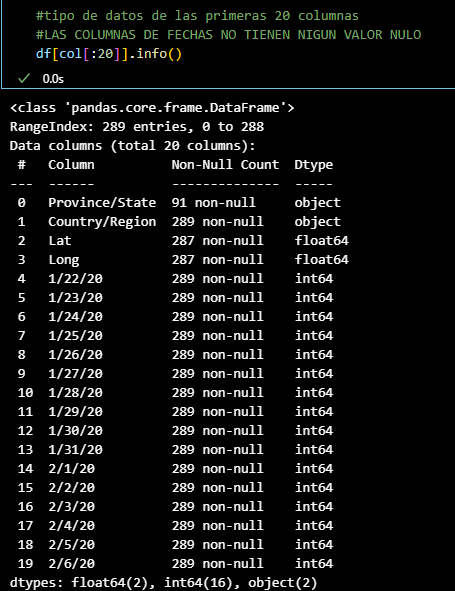

### <span style="color:BLUE; font-weight:bold">CAMBIO DE FORMATO EN LAS FECHAS</span>

In [14]:
# Se indentifico que la columna Fechas es de tipo string se pasa a Date
df_id['Fechas'] = pd.to_datetime(df_id['Fechas'], format='%m/%d/%y')
df_id.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 330327 entries, ('Afghanistan', nan) to ('Zimbabwe', nan)
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   Lat     328041 non-null  float64       
 1   Long    328041 non-null  float64       
 2   Fechas  330327 non-null  datetime64[ns]
 3   Casos   330327 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 11.0+ MB


### <span style="color:RED; font-weight:bold">CORRECIÓN DE DATOS ACUMULADOS</span>

In [15]:
df_fin_mes = df_id[df_id['Fechas'].dt.is_month_end]
df_fin_mes

,,Lat,Long,Fechas,Casos
Country/Region,Province/State,,,,
Afghanistan,NaN,33.939110,67.709953,2020-01-31,0
Albania,NaN,41.153300,20.168300,2020-01-31,0
Algeria,NaN,28.033900,1.659600,2020-01-31,0
Andorra,NaN,42.506300,1.521800,2020-01-31,0
Angola,NaN,-11.202700,17.873900,2020-01-31,0
...,...,...,...,...,...
West Bank and Gaza,NaN,31.952200,35.233200,2023-02-28,703228
Winter Olympics 2022,NaN,39.904200,116.407400,2023-02-28,535
Yemen,NaN,15.552727,48.516388,2023-02-28,11945


In [16]:
df_resultado = df_fin_mes.copy()
# 1. Agrupar por 'Country/Region' y luego calcular la diferencia usando diff()
#    Esto calcula la diferencia entre la fila actual y la anterior dentro de cada grupo.
df_resultado['Casos_Totales_Por_Mes'] = df_resultado.groupby('Country/Region')['Casos'].diff()


df_resultado['Casos_Totales_Por_Mes'] = df_resultado['Casos_Totales_Por_Mes'].fillna(df_resultado['Casos'])

df_resultado.head() # se saco los casos por mes 

,,Lat,Long,Fechas,Casos,Casos_Totales_Por_Mes
Country/Region,Province/State,,,,,
Afghanistan,NaN,33.93911,67.709953,2020-01-31,0,0.0
Albania,NaN,41.15330,20.168300,2020-01-31,0,0.0
Algeria,NaN,28.03390,1.659600,2020-01-31,0,0.0
Andorra,NaN,42.50630,1.521800,2020-01-31,0,0.0
Angola,NaN,-11.20270,17.873900,2020-01-31,0,0.0


In [17]:
df_resultado.columns

Index(['Lat', 'Long', 'Fechas', 'Casos', 'Casos_Totales_Por_Mes'], dtype='object')

### <span style="color:RED; font-weight:bold">CORRECIÓN DE PREGUNTA 1 PASADA</span>

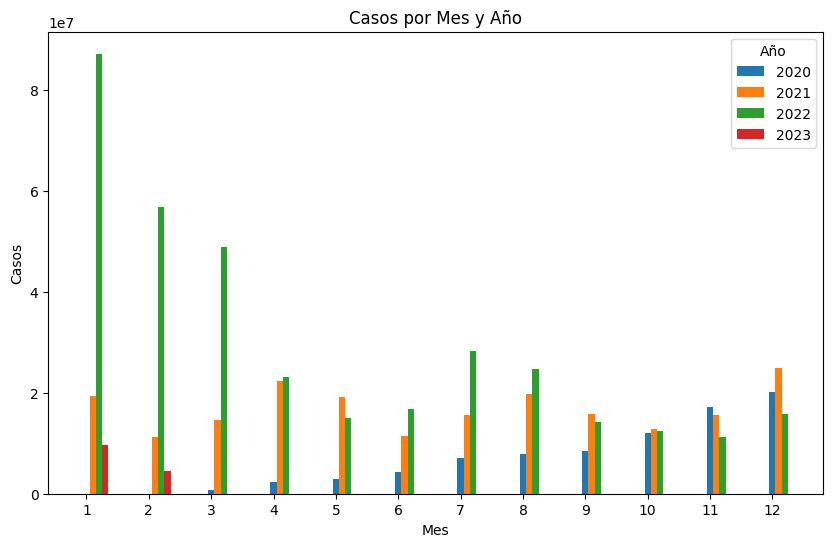

In [18]:
# Partimos del df_resultado que ya tiene Casos_Totales_Por_Mes
df_resultado['Fechas'] = pd.to_datetime(df_resultado['Fechas'], errors='coerce')

df_resultado['Año'] = df_resultado['Fechas'].dt.year
df_resultado['Mes'] = df_resultado['Fechas'].dt.month

# Total de casos por mes y año (sumando todos los países)
df_grouped = (
    df_resultado
    .groupby(['Año', 'Mes'], as_index=False)['Casos_Totales_Por_Mes']
    .sum()
)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

for year in df_grouped['Año'].unique():
    subset = df_grouped[df_grouped['Año'] == year]
    offset = (year - df_grouped['Año'].min()) * 0.1
    plt.bar(
        subset['Mes'] + offset,
        subset['Casos_Totales_Por_Mes'],
        width=0.1,
        label=str(year)
    )

plt.title('Casos por Mes y Año')
plt.xlabel('Mes')
plt.ylabel('Casos')
plt.legend(title='Año')
plt.xticks(range(1, 13))
plt.show()


### <span style="color:RED; font-weight:bold">CORRECIÓN DE PREGUNTA 2 PASADA</span>

In [19]:


# Agrupar por 'Country/Region' y 'Fechas' (mes), sumar casos mensuales
contagios_por_pais_mes = (
    df_resultado
    .groupby(['Country/Region', df_resultado['Fechas'].dt.to_period('M')])['Casos_Totales_Por_Mes']
    .sum()
    .reset_index()
    .rename(columns={'Fechas': 'Mes_Anio'})
)

# Convertir Period a string para mejor visualización (opcional)
contagios_por_pais_mes['Mes_Anio'] = contagios_por_pais_mes['Mes_Anio'].astype(str)

# Ordenar por casos descendente
contagios_por_pais_mes = contagios_por_pais_mes.sort_values('Casos_Totales_Por_Mes', ascending=False)

# Mostrar
MAYOR=contagios_por_pais_mes.loc[contagios_por_pais_mes["Country/Region"]== "US"]
MAYOR["Casos_Totales_Por_Mes"].iloc[0]
print(f'''El pais con mayor de contagios en el Enero del 2022 es:{MAYOR["Country/Region"].iloc[0]}
y la cantidad de casos fue {MAYOR["Casos_Totales_Por_Mes"].iloc[0]}''')


El pais con mayor de contagios en el Enero del 2022 es:US
y la cantidad de casos fue 20336435.0


### <span style="color:BLUE; font-weight:bold">VISUALIZACIONES</span>

In [20]:
# Crear una copia de df_resultado con el índice convertido a columnas
df_res = df_resultado.reset_index()   



In [21]:
df_top3 = (
    df_res
    .sort_values(['Country/Region', 'Fechas'])
    .groupby('Country/Region', as_index=False)['Casos']
    .last()                      # último valor acumulado por país
    .sort_values('Casos', ascending=False)
    .head(3)
)

df_top3


,Country/Region,Casos
186,US,103443455
80,India,44687837
63,France,38579269


In [22]:
paises_top3 = df_top3['Country/Region'].tolist()
print("Top 3 países:", paises_top3)


Top 3 países: ['US', 'India', 'France']


In [23]:
# Filtramos solo los países del top 3  
df_top = df_res[df_res['Country/Region'].isin(paises_top3)].copy()

#crear columnas año y mes
#df_top['Fechas'] = pd.to_datetime(df_top['Fechas'])
df_top['Año'] = df_top['Fechas'].dt.year
df_top['Mes'] = df_top['Fechas'].dt.month

# Agrupamos por país, año y mes sumando los casos del mes
df_mensual = (
    df_top
    .groupby(['Country/Region', 'Año', 'Mes'], as_index=False)['Casos_Totales_Por_Mes']
    .sum()
    .rename(columns={'Casos_Totales_Por_Mes': 'Casos_Mensuales'})
)

df_mensual.head()


,Country/Region,Año,Mes,Casos_Mensuales
0,France,2020,1,5.0
1,France,2020,2,95.0
2,France,2020,3,51479.0
3,France,2020,4,115747.0
4,France,2020,5,20491.0


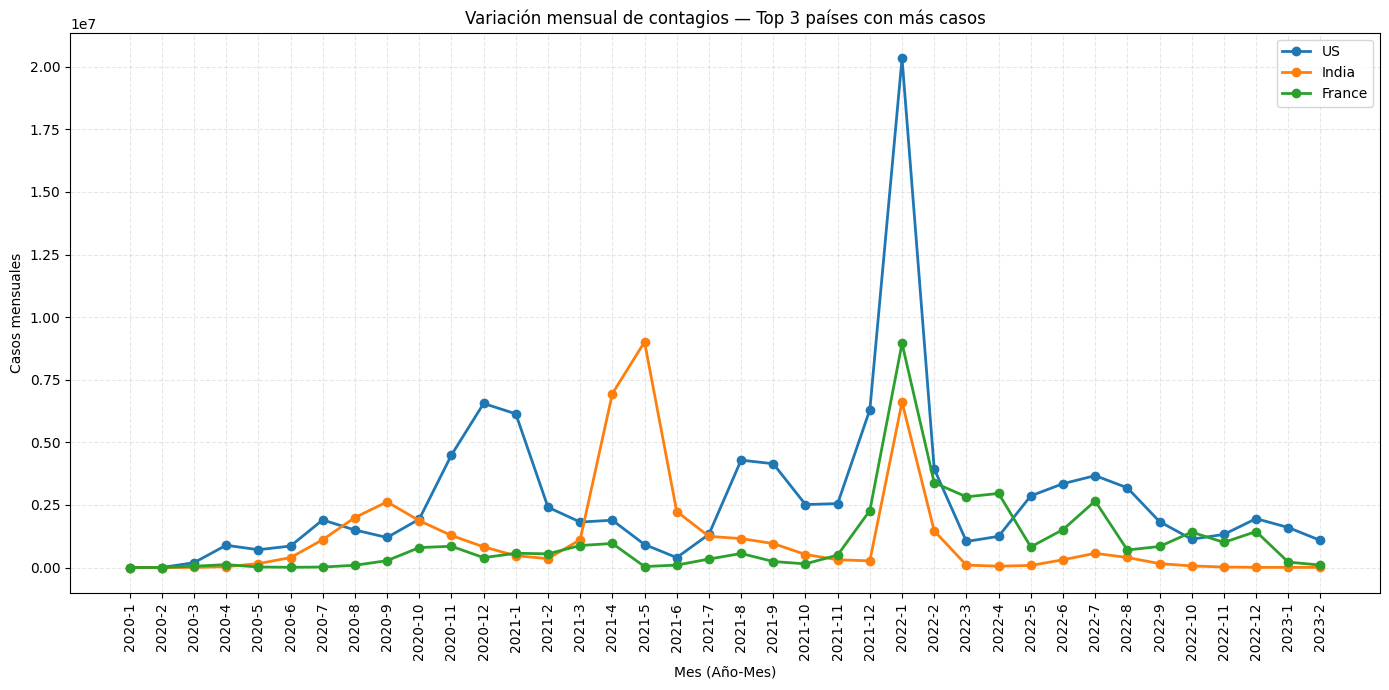

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,7))

for pais in paises_top3:
    subset = df_mensual[df_mensual['Country/Region'] == pais]

    # Etiqueta Año-Mes para el eje X
    x_labels = subset['Año'].astype(str) + "-" + subset['Mes'].astype(str)

    plt.plot(
        x_labels,
        subset['Casos_Mensuales'],
        marker='o',
        linewidth=2,
        label=pais
    )

plt.title("Variación mensual de contagios — Top 3 países con más casos")
plt.xlabel("Mes (Año-Mes)")
plt.ylabel("Casos mensuales")
plt.xticks(rotation=90)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


In [26]:
df_resultado.columns

Index(['Lat', 'Long', 'Fechas', 'Casos', 'Casos_Totales_Por_Mes', 'Año',
       'Mes'],
      dtype='object')

In [ ]:
cinco_paises = df_resultado.reset_index()
# última fecha del DataFrame
lastdate = df_resultado['Fechas'].max()
cinco_paises = cinco_paises.loc[
    (
    (cinco_paises["Country/Region"] == "France") |
    (cinco_paises["Country/Region"] == "Germany") |
    (cinco_paises["Country/Region"] == "United Kingdom") |
    (cinco_paises["Country/Region"] == "Italy") |
    (cinco_paises["Country/Region"] == "Spain")
     ) &
    (cinco_paises["Fechas"] == lastdate)
]

# --- 1. Preparación de los Datos (asumiendo que ya tienes 'cinco_paises' y 'lastdate') ---

# Recreación de los datos agrupados finales
# (Asegúrate de que esta parte de tu código ya se ha ejecutado y 'cinco_paises' está listo)

# Convertimos la Serie agrupada a un DataFrame para Plotly
datos_finales_mapa = cinco_paises.groupby("Country/Region")["Casos"].sum().reset_index()
datos_finales_mapa.rename(columns={'Casos': 'Total Casos a Última Fecha'}, inplace=True)

# --- 2. Creación del Mapa con Plotly Express y Ajustes de Zoom ---

fig = px.choropleth(
    datos_finales_mapa,
    locations="Country/Region",
    locationmode='country names',
    color="Total Casos a Última Fecha",
    hover_name="Country/Region",
    color_continuous_scale=px.colors.sequential.Plasma,
    title='Casos Reportados a Última Fecha en Cinco Países Europeos'
)

# Ajustes para centrar y enfocar el mapa
fig.update_geos(
    scope='europe',                       # Mantiene el scope en Europa
    showcountries=True,
    countrycolor="Gray",
    showsubunits=True,
    subunitcolor="Black",
    # --- Nuevos parámetros para acercar y centrar ---
    center={"lat": 47, "lon": 6},       # Latitud y longitud aproximadas para el centro de tu región
    lataxis_range=[35, 65],               # Rango de latitud para el zoom (ajusta según necesites)
    lonaxis_range=[-1, 25]                # Rango de longitud para el zoom (ajusta según necesites)
)

# Muestra el mapa interactivo
fig.show()
datos_finales_mapa = datos_finales_mapa.sort_values(
    by='Total Casos a Última Fecha', 
    ascending=False
)

print("\nDatos Finales Agrupados Usados para el Mapa:")

datos_finales_mapa

C:\Users\jeam2\AppData\Local\Temp\ipykernel_26112\639163412.py:25: DeprecationWarning:

The library used by the *country names* `locationmode` option is changing in an upcoming version. Country names in existing plots may not work in the new version. To ensure consistent behavior, consider setting `locationmode` to *ISO-3*.




Datos Finales Agrupados Usados para el Mapa:


,Country/Region,Total Casos a Última Fecha
0,France,39827175
1,Germany,38168908
2,Italy,25576852
4,United Kingdom,24603373
3,Spain,13763336


<ol style="color:black; font-size:16px; line-height:1.6;">
  <li>
    <b>¿Cuál es la importancia del uso de una herramienta de limpieza y preparación de datos como Pandas para gestionar datos en el contexto de la Ciencia de Datos?</b>
    <br><br>
    <span style="color:#2B2B2B.;">
      <b>R/</b> El uso de <b>Pandas</b> en la ciencia de datos es esencial para limpiar, transformar y analizar información. 
      Su eficiencia permite preparar datos de alta calidad antes de su almacenamiento en un <b>Data Lake</b>, 
      mejorando la consistencia y reduciendo la redundancia. Además, facilita la integración con otras herramientas del ecosistema 
      <b>Python</b>, optimizando la gestión y reutilización de los datos.
    </span>
  </li>
  <br>
  <li>
    <b>¿Cómo podría ayudar esta herramienta para mejorar el almacenamiento en un Data Lake?</b>
    <br><br>
    <span style="color:#2B2B2B.;">
      <b>R/</b> Un <b>Data Lake</b> funciona como un repositorio centralizado donde se almacenan cualquier tipo de datos en su formato original, 
      sin necesidad de definir una estructura previa. <b>Pandas</b> puede ayudar a filtrar, validar y transformar los datos antes de su ingreso, 
      evitando la acumulación de información redundante o de baja calidad. Esto mejora la gobernanza, la seguridad y la eficiencia del 
      <b>Data Lake</b>, permitiendo que los datos sean más accesibles y confiables para herramientas de análisis avanzado, inteligencia artificial 
      o aprendizaje automático, dependiendo del negocio y de los objetivos planteados.
    </span>
  </li>
</ol>

## <span style="color:BLUE; font-weight:bold">BIBLIOGRAFÍA</span>

<ul style="color:darkblue;">
  <li>Pandas Documentation. (2024). <i>pandas.pydata.org</i>. Recuperado de <a href="https://pandas.pydata.org" style="color:skyblue;">https://pandas.pydata.org</a></li>
  <li>Amazon Web Services. (2023). <i>What is a Data Lake?</i> Recuperado de <a href="https://aws.amazon.com/big-data/datalakes-and-analytics/what-is-a-data-lake/" style="color:skyblue;">aws.amazon.com</a></li>
</ul>